<span style="color:darkorchid">
<h1><center>Lab4</center></h1>
<h3><center><i>Feature engineering / ML models</i></center></h3></span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [3]:
results_hight=[]
results_low=[]

### 1. Wczytaj końcowe i przetworzone zbiory danych z zajęć Lab3

In [4]:
X_test=pd.read_csv(r'C://Users/48510/Desktop/ML/X_test.csv')
X_train=pd.read_csv(r'C://Users/48510/Desktop/ML/X_train.csv')
y_train=pd.read_csv(r'C://Users/48510/Desktop/ML/y_train.csv')
y_test=pd.read_csv(r'C://Users/48510/Desktop/ML/y_test.csv')

In [5]:
X_test.head(10)

,Unnamed: 0,cabin,CabinReduced,sex,cabin_map,cabin_reduced_map,sex_map
0,1139,0,n,male,0,7,1
1,533,0,n,female,0,7,0
2,459,0,n,male,0,7,1
3,1150,0,n,male,0,7,1
4,393,0,n,male,0,7,1
5,1189,G6,G,female,99,4,0
6,5,E12,E,male,96,6,1
7,231,C104,C,male,114,8,1
8,330,0,n,male,0,7,1
9,887,0,n,male,0,7,1


In [6]:
X_train=X_train.drop(['Unnamed: 0','cabin','CabinReduced','sex'],axis=1)

In [7]:
X_test=X_test.drop(['Unnamed: 0','cabin','CabinReduced','sex'],axis=1)

In [8]:
y_train=y_train.drop('Unnamed: 0',axis=1).values.ravel()
y_test=y_test.drop('Unnamed: 0',axis=1).values.ravel()

### 2. Scharakteryzuj algorytm Random Forests na podstawie informacji zawartej w dokumentacji biblioteki scikit-learn dla RandomForestClassifier

<span style="color:darkorchid">
<b>Random Forest</b>

Algorytm Random Forest polega na wykorzystaniu wielu drzew decyzyjnych w celu wygenerowania predykcji, a następnie wybrania z nich najczęściej występującego rezultatu -to zespół drzew decyzyjnych, zwykle trenowanych metodą "bagging".Algorytm ustala wynik na podstawie przewidywań drzew decyzyjnych.

Każde drzewo decyzyjne składa się z węzłów decyzyjnych, węzłów liści i węzła głównego. Węzeł liścia każdego drzewa jest końcowym wynikiem danego drzewa decyzyjnego. Wybór ostatecznego wyniku odbywa się w systemie głosowania większościowego. W tym przypadku wyjście wybrane przez większość drzew decyzyjnych staje się ostatecznym wyjściem/wynikiem Random Forest. 

Mówiąc prościej: losowy las buduje wiele drzew decyzyjnych i łączy je ze sobą, aby uzyskać dokładniejszą i stabilniejszą prognozę. Zwiększenie liczby drzew zwiększa precyzję wyniku. </span>






### 3. Zbuduj, wytrenuj model oraz dokonaj predykcji używając metody Random Forest dla danych o wysokiej i niskiej liczbności cech

#### dane o wysokiej liczebności cech:

In [9]:
#tworzenie modelu
RF=RandomForestClassifier()

#trenowanie modelu
model1=RF.fit(X_train[['sex_map','cabin_map']],y_train)

#predykcja
PredTrain_rf1=model1.predict_proba(X_train[['sex_map','cabin_map']])
PredTest_rf1=model1.predict_proba(X_test[['sex_map','cabin_map']])

roc_auc_score dla danych testowych: 0.7790913113212765
roc_auc_score dla danych treningowych: 0.8555945234704813


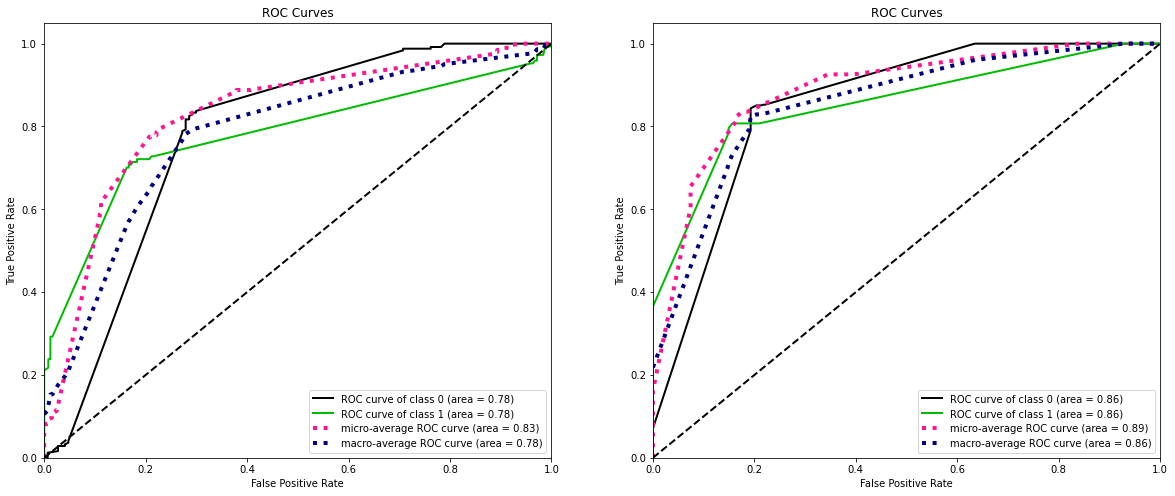

In [10]:
auc_rf_test1 = roc_auc_score(y_test,PredTest_rf1[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_rf_test1))

auc_rf_train1 = roc_auc_score(y_train,PredTrain_rf1[:,1]) 
print("roc_auc_score dla danych treningowych: {}".format(auc_rf_train1))

results_hight.append({'auc_train':auc_rf_train1, 'auc_test':auc_rf_test1})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_rf1,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_rf1,ax=ax2)
plt.show()

#### dane o niskiej liczebności cech:

In [11]:
#trenowanie modelu
model2_rf=RF.fit(X_train[['sex_map','cabin_reduced_map']],y_train)

#predykcja
PredTrain_rf2=model2_rf.predict_proba(X_train[['sex_map','cabin_reduced_map']])
PredTest_rf2=model2_rf.predict_proba(X_test[['sex_map','cabin_reduced_map']])

auc_rf_test2 = roc_auc_score(y_test,PredTest_rf2[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_rf_test2))

auc_rf_train2 = roc_auc_score(y_train,PredTrain_rf2[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_rf_train2))


results_low.append({'auc_train':auc_rf_train2, 'auc_test':auc_rf_test2})

roc_auc_score dla danych testowych: 0.8016564349316962
roc_auc_score dla danych treningowych: 0.8163772586155712


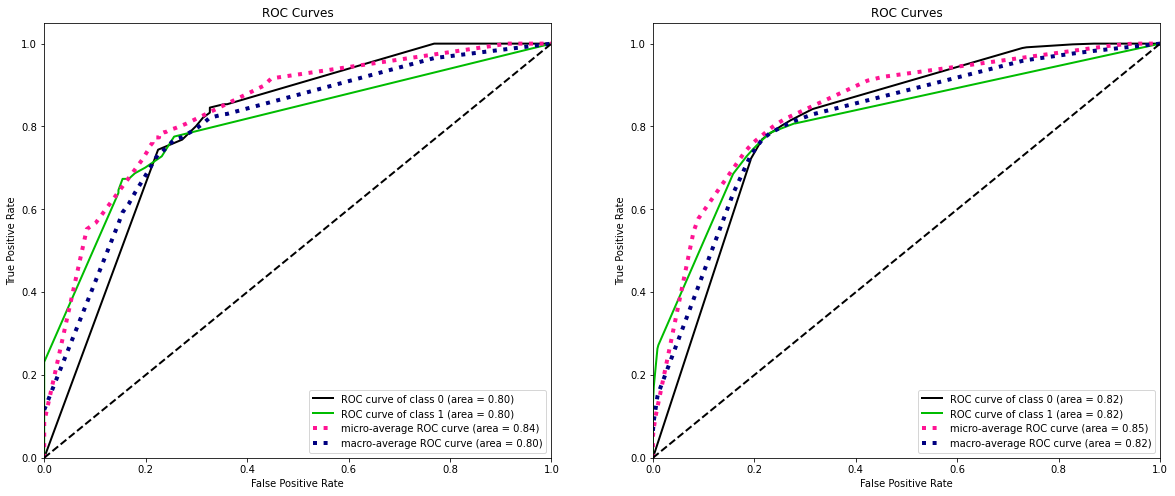

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_rf2,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_rf2,ax=ax2)
plt.show()

### 4. Jak różnią się wyniki dla danych z dużą liczebnością i niską liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie? Dlaczego?

Większą różnicę między wynikiem dla zbioru testowego a treningowego otrzymałam w przypadku danych o wyższej liczebności cech. W obu przypadkach wynik dla zbioru treningowego był wyższy  niż dla zbioru testowego. Ogólnie lepsze wyniki otrzymałam dla danych z dużą liczebnością cech. Wynik auc dla zbioru treningowego jest wyższy dla danych z dużą ilością cech .Większą tendencję do overfittingu można zauważyć dla danych o wysokiej liczebności cech - różnica między wartościami auc zbioru treningowego a testowego wyniosła aż 0.08, czyli dużo więcej niż dla danych ze o niskiej liczebności cech

### 5. Powtórz krok 2-4 dla algorytmu LogisticRegression

<span style="color:darkorchid">
<b>Logistic Regression </b>

Regresja logistyczna umożliwia rozwiązywanie problemów związanych z klasyfikacją binarną. Pozwala ona określić przynależność zmiennej wejściowej do jednej z dwóch zdefiniowanych wcześniej klas.Regresja logistyczna dokonuje prognozy wartości
w oparciu o ważoną sumę cech dla danych wejściowych. Do szacowania prawdopodobieństwa wykorzystywana jest funkcja logistyczna.
Jeśli prawdopodobieństwo wynosi więcej niż 0.5, możemy przyjąć wyjście jako prognozę dla klasy domyślnej (klasa 0), w przeciwnym razie przewidywanie jest dla
drugiej klasy (klasa 1).</span>


#### dane o wysokiej liczebności cech:

In [13]:
LogisticRegression=LogisticRegression()
model1_lr=LogisticRegression.fit(X_train[['sex_map','cabin_map']],y_train)

PredTrain_lr=model1_lr.predict_proba(X_train[['sex_map','cabin_map']])
PredTest_lr=model1_lr.predict_proba(X_test[['sex_map','cabin_map']])

auc_lr_test1 = roc_auc_score(y_test,PredTest_lr[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_lr_test1))

auc_lr_train1 = roc_auc_score(y_train,PredTrain_lr[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_lr_train1))

results_hight.append({'auc_train':auc_lr_train1, 'auc_test':auc_lr_test1})

roc_auc_score dla danych testowych: 0.8036474752502627
roc_auc_score dla danych treningowych: 0.8134890484504804


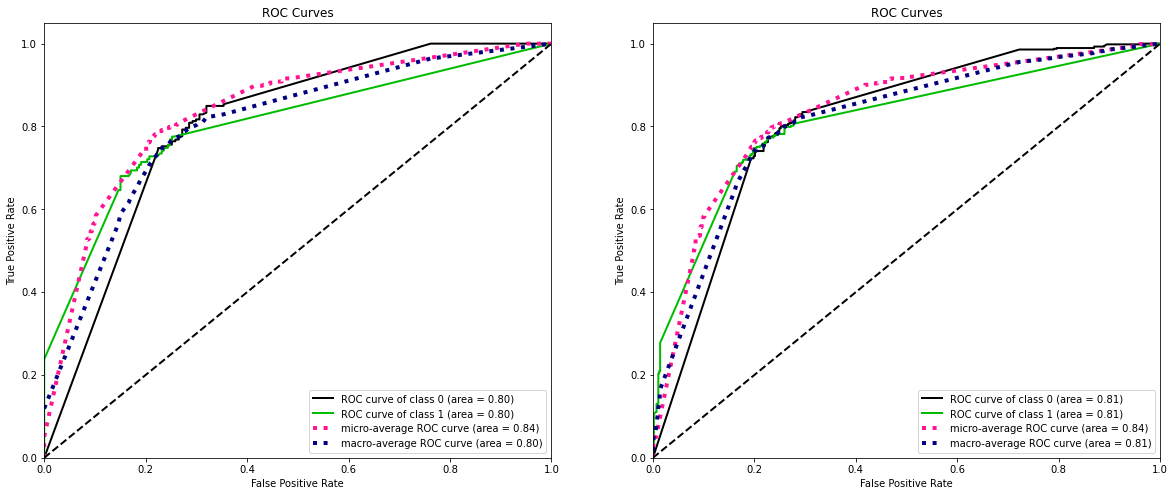

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_lr,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_lr,ax=ax2)
plt.show()

#### dane o niskiej liczebności cech:


In [15]:

model2_lr=LogisticRegression.fit(X_train[['sex_map','cabin_reduced_map']],y_train)

PredTrain_lr2=model2_lr.predict_proba(X_train[['sex_map','cabin_reduced_map']])
PredTest_lr2=model2_lr.predict_proba(X_test[['sex_map','cabin_reduced_map']])

auc_lr_test2 = roc_auc_score(y_test,PredTest_lr2[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_lr_test2))

auc_lr_train2 = roc_auc_score(y_train,PredTrain_lr2[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_lr_train2))


results_low.append({'auc_train':auc_lr_train2, 'auc_test':auc_lr_test2})

roc_auc_score dla danych testowych: 0.761254908467452
roc_auc_score dla danych treningowych: 0.7968038482633001


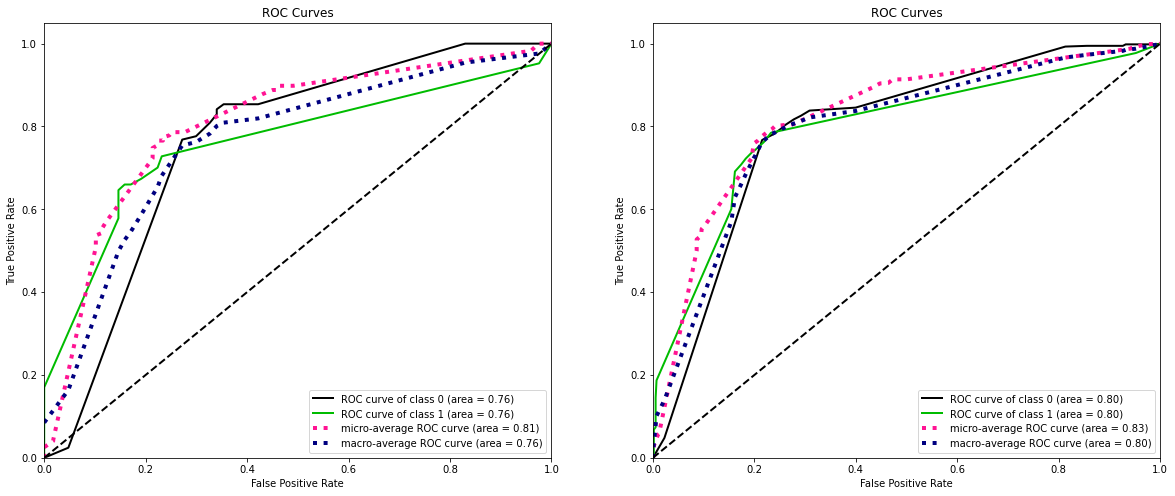

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_lr2,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_lr2,ax=ax2)
plt.show()

Większą różnicę między wynikiem dla zbioru testowego a treningowego otrzymałam w przypadku danych o niższej  liczebności cech. W obu przypadkach wynik dla zbioru treningowego był wyższy niż dla zbioru testowego. Dane z większą ilością cech wykazały wieksze wartości auc. W tym przypadku większą tendencję do wystąpienia overvittingu można zauważyć dla danych o niższej liczebności cech- tutaj wynik AUC był dużo wyższy dla danych treningowych niż testowych, a różnica między tymi danymi jest też znacząco wyższa w porównaniu do różnicy między danymi o dużej ilości cech.

### 6. Powtórz krok 2-4 dla algorytmu GradientBoostingClassifier

<span style="color:darkorchid">
<b>GradientBoostingClassifier</b>

Gradient Boosting buduje model addytywny w sposób postępowy; pozwala na optymalizację dowolnych różniczkowalnych funkcji strat. Na każdym etapie drzewa regresji są dopasowywane do ujemnego gradientu dwumianowej lub wielomianowej funkcji straty odchylenia.
     
     
Gradient Boost jest algorytmem z rodziny metod zespołowych, a konkretnie boostingu. Metoda ta wykorzystuje wiele prostych algorytmów typu drzewo decyzyjne, aby zredukować zarówno bias i wariancje modelu.  GB uczy drzewa decyzyjne, które zazwyczaj są bardziej rozbudowane w tym algorytmie niż sam korzeń (od 8 do 32 liści). Następne budowane drzewo jest oparte na błędach predykcji poprzedniego oraz nadawana jest mu waga. Waga ta jednak jest stała dla wszystkich drzew. Takie drzewa są budowane aż do osiągniecia warunków stopu, czyli albo skończy się liczba wskazanych do stworzenia przez nas drzew, albo kolejne drzewa nie zwiększą jakości dopasowania do danych.</span>


#### dane o wysokiej liczebności cech

roc_auc_score dla danych testowych: 0.8024169017200375
roc_auc_score dla danych treningowych: 0.8450253850527578


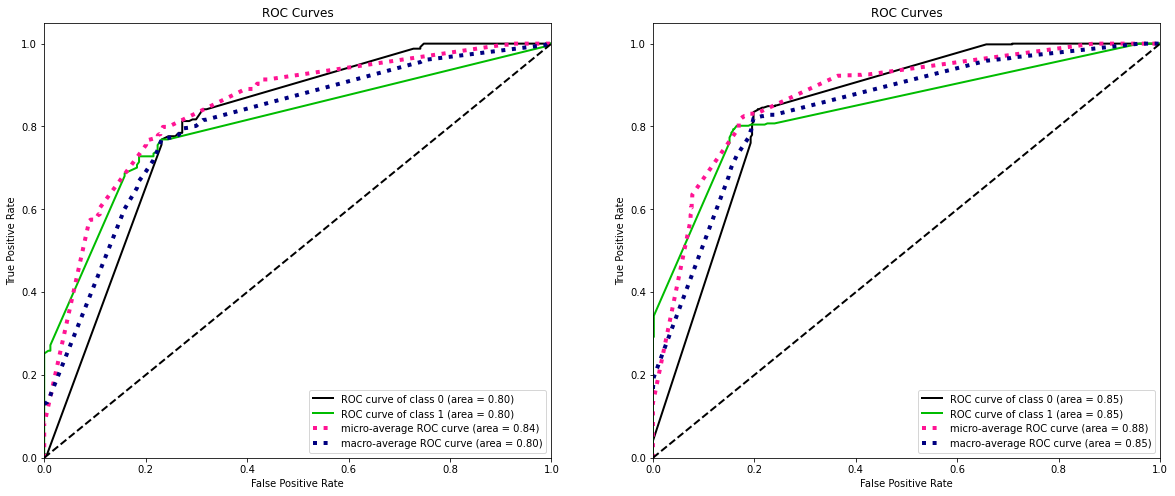

In [17]:
GradientBoostingClassifier=GradientBoostingClassifier()
model1_gbc=GradientBoostingClassifier.fit(X_train[['sex_map','cabin_map']],y_train)

PredTrain_gbc=model1_gbc.predict_proba(X_train[['sex_map','cabin_map']])
PredTest_gbc=model1_gbc.predict_proba(X_test[['sex_map','cabin_map']])

auc_gbc_test = roc_auc_score(y_test,PredTest_gbc[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_gbc_test))

auc_gbc_train = roc_auc_score(y_train,PredTrain_gbc[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_gbc_train))


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_gbc,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_gbc,ax=ax2)
plt.show()

results_hight.append({'auc_train':auc_gbc_train, 'auc_test':auc_gbc_test})


#### dane o niskiej liczebności cech

roc_auc_score dla danych testowych: 0.8016564349316962
roc_auc_score dla danych treningowych: 0.816719415917359


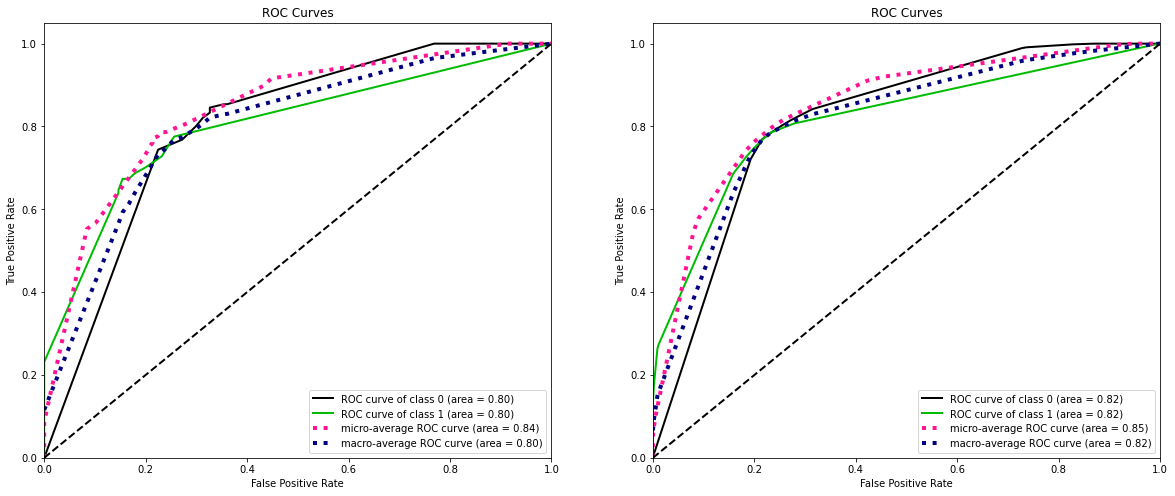

In [18]:
model2_gbc=GradientBoostingClassifier.fit(X_train[['sex_map','cabin_reduced_map']],y_train)

PredTrain_gbc2=model2_gbc.predict_proba(X_train[['sex_map','cabin_reduced_map']])
PredTest_gbc2=model2_gbc.predict_proba(X_test[['sex_map','cabin_reduced_map']])

auc_gbc_test2 = roc_auc_score(y_test,PredTest_gbc2[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_gbc_test2))

auc_gbc_train2 = roc_auc_score(y_train,PredTrain_gbc2[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_gbc_train2))


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_gbc2,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_gbc2,ax=ax2)
plt.show()

results_low.append({'auc_train':auc_gbc_train2, 'auc_test':auc_gbc_test2})

Dla Gradient Boosting Classifier można zauważyć, że wyniki kształtują się na podobnej wysokości w okolicach 0,8. Zjawisko overfittingu można zauważyć dla danych o wyższej liczebności cech- wartość AUC jest wyższa dla danych treningowych niż testowych, roznica dla danych o wysokiej liczebności cech wynosi az 0.04. Widać to także na wykresach -pole pod powierzchnią krzywej ROC jest znacznie wyższe dla danych z dużą kardynalnością-0.85.

### 7. Powtórz krok 2-4 dla algorytmu AdaBoostClassifier

<span style="color:darkorchid">
<b>AdaBoostClassifier</b>

Klasyfikator AdaBoost buduje silny klasyfikator, łącząc wiele klasyfikatorów o niskiej wydajności, dzięki czemu uzyskuje się klasyfikator o wysokiej dokładności.Polega on na sekwencyjnym uczeniu estymatorów, w taki sposób, ze każdy następny koryguje swojego poprzednika, poprzez zwracanie większej uwagi na przykłady uczące, dla których poprzedni estymator otrzymał największe błędy.Przypisuje wyższą wagę błędnym sklasyfikowanym obserwacjom, dzięki czemu w następnej iteracji obserwacje te uzyskają wysokie prawdopodobieństwo klasyfikacji - w ten sposób kolejne estymatory przykładają większą uwagę do najtrudniejszych przykładów. 

Przykładanie większej uwagi do przykładów uczących dla których poprzedni estymator pozostał niedotrenowany, polega na ponownym próbkowaniu (ze zwracaniem) danych uczących, gdzie prawdopodobienstwo wylosowania przykładu jest większe dla przykładów o większej wadze.
</span>


#### dane o wysokiej liczebności cech

roc_auc_score dla danych testowych: 0.80796139594049
roc_auc_score dla danych treningowych: 0.8232254363763529


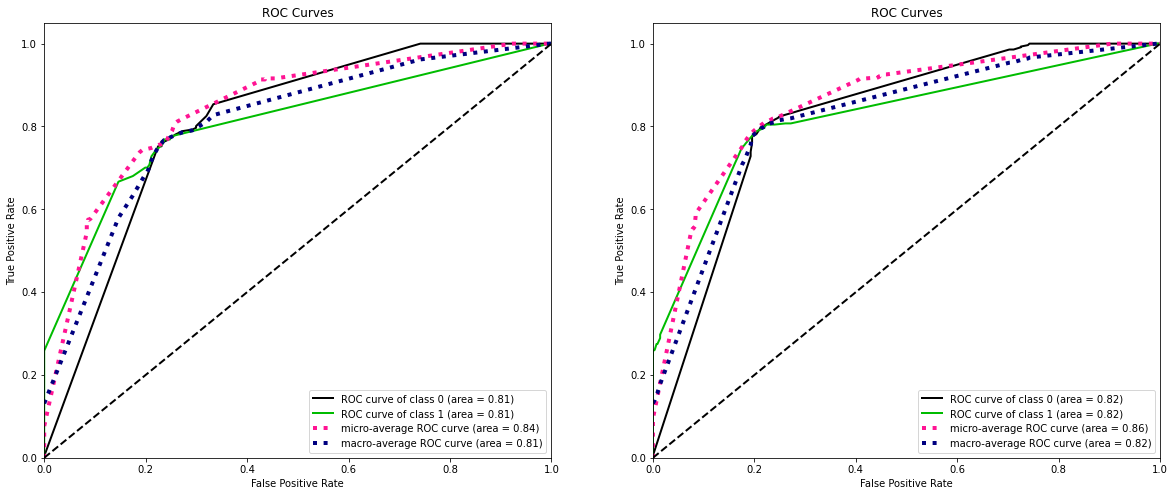

In [19]:
AdaBoostClassifier=AdaBoostClassifier()
model1_abc=AdaBoostClassifier.fit(X_train[['sex_map','cabin_map']],y_train)

PredTrain_abc1=model1_abc.predict_proba(X_train[['sex_map','cabin_map']])
PredTest_abc1=model1_abc.predict_proba(X_test[['sex_map','cabin_map']])

auc_abc_test = roc_auc_score(y_test,PredTest_abc1[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_abc_test))

auc_abc_train = roc_auc_score(y_train,PredTrain_abc1[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_abc_train))

results_hight.append({'auc_train':auc_abc_train, 'auc_test':auc_abc_test})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_abc1,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_abc1,ax=ax2)
plt.show()

#### dane o niskiej liczebności cech

roc_auc_score dla danych testowych: 0.8005226480836237
roc_auc_score dla danych treningowych: 0.816201148239651


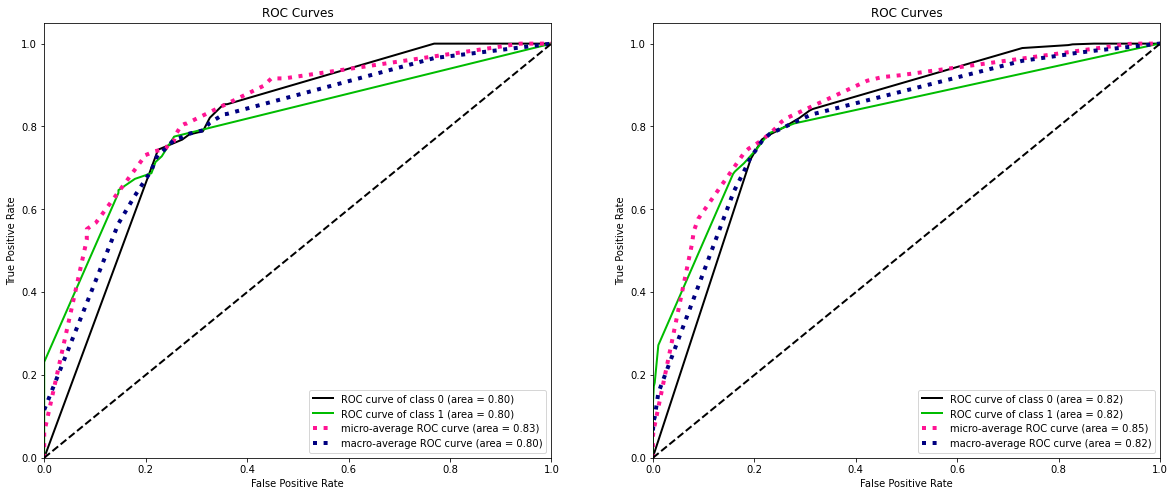

In [20]:
model2_abc=AdaBoostClassifier.fit(X_train[['sex_map','cabin_reduced_map']],y_train)

PredTrain_abc2=model2_abc.predict_proba(X_train[['sex_map','cabin_reduced_map']])
PredTest_abc2=model2_abc.predict_proba(X_test[['sex_map','cabin_reduced_map']])

auc_abc_test2 = roc_auc_score(y_test,PredTest_abc2[:,1])
print("roc_auc_score dla danych testowych: {}".format(auc_abc_test2))

auc_abc_train2 = roc_auc_score(y_train,PredTrain_abc2[:,1])
print("roc_auc_score dla danych treningowych: {}".format(auc_abc_train2))

results_low.append({'auc_train':auc_abc_train2, 'auc_test':auc_abc_test2})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
skplt.metrics.plot_roc(y_test, PredTest_abc2,ax=ax1)
skplt.metrics.plot_roc(y_train, PredTrain_abc2,ax=ax2)
plt.show()

Ten klasyfikator daje wyższe wartości AUC dla danych treningowych niż testowych. Wartości auc dla zbiorów treningowych i testowych są zbliżone zarówno dla danych z dużą kardynalnością, jak i z małą i kształtują się na dosyć wysokim poziomie 0.8, a rożnica między wartościami w obu przypadkach wynosi ok 0.015 więc wydaje mi się, że w obu przypadkach dopasowanie jest zbyt duże i oba przypadki wykazują tendencję do overfittingu.

### 8. Porównaj w/w algorytmy pomiędzy sobą w oparciu o przeprowadzone badania. Które z nich mają największą tendencję do nadmiernego dopasowania?

In [21]:
low_values_df = pd.DataFrame(results_low, index =['Random Forest', 'Logistic Regression', 'Gradient Boosting Classifier','Ada Boost Classifier'])
low_values_df['result_diff'] = low_values_df['auc_train'] - low_values_df['auc_test']

In [22]:
hight_values_df = pd.DataFrame(results_hight, index =['Random Forest', 'Logistic Regression', 'Gradient Boosting Classifier','Ada Boost Classifier'])
hight_values_df['result_diff'] = hight_values_df['auc_train'] - hight_values_df['auc_test']

#### porównanie rezultatów dla danych z niską liczebnością cech:

In [23]:
low_values_df

,auc_train,auc_test,result_diff
Random Forest,0.816377,0.801656,0.014721
Logistic Regression,0.796804,0.761255,0.035549
Gradient Boosting Classifier,0.816719,0.801656,0.015063
Ada Boost Classifier,0.816201,0.800523,0.015679


#### porównanie rezultatów dla danych z wysoką liczebnością cech:

In [24]:
hight_values_df

,auc_train,auc_test,result_diff
Random Forest,0.855595,0.779091,0.076503
Logistic Regression,0.813489,0.803647,0.009842
Gradient Boosting Classifier,0.845025,0.802417,0.042608
Ada Boost Classifier,0.823225,0.807961,0.015264


Wszystkie klasyfikatory dają podobne rezultaty - z reguły wyższe wyniki dla zbioru o wysokiej kardynalności. Najwiekszą tendencję do nadmiernego dopasowania można zaobserwować dla GradientBoostingClassifier oraz Random Forest- dają one największe różnice pomiędzy wartościami dla zbioru treningowego a testowego w przypadku danych z dużą liczebnością cech.Na podstawie wyników mogę stwierdzić, że ogólnie większe tendencje do dużego dopasowania wykazują dane z dużą liczebnością cech. Według mnie najlepiej spośród badanych klasyfikatorów sprawdziła się regresja logistyczna - na wykresie roc curve krzywa była nachylona w stronę lewego górnego rogu, różnice pomiędzy wartościami dla zbioru o dużej kardynalności były najmniejsze, co więcej regresja logistyczna jest prostym w zrozumieniu i działaniu klasyfikatorem.  

### 9. Jaka jest różnica pomiędzy predict_proba a predict?
Metoda "predict" służy do przewidywania rzeczywistej estykiety (klasy) dla nowego zestawu danych, a metoda "predict_proba"  służyć do wywnioskowania prawdopodobieństw klas (zwraca prawdopodobieństwa klas dla każdego punktu danych)

In [25]:
predict=model1.predict(X_test[['sex_map','cabin_reduced_map']])
predict_proba=model1.predict_proba(X_test[['sex_map','cabin_reduced_map']])
print("metoda predict:\n {}".format(predict))

metoda predict:
 [0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1]


In [26]:
print("metoda predict_proba:\n {}".format(predict_proba))

metoda predict_proba:
 [[0.85295189 0.14704811]
 [0.35919926 0.64080074]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.48314286 0.51685714]
 [0.48596994 0.51403006]
 [0.77510213 0.22489787]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.35919926 0.64080074]
 [0.         1.        ]
 [0.85295189 0.14704811]
 [0.35919926 0.64080074]
 [0.54277228 0.45722772]
 [0.35919926 0.64080074]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.         1.        ]
 [0.85295189 0.14704811]
 [0.35919926 0.64080074]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.35919926 0.64080074]
 [0.35919926 0.64080074]
 [0.         1.        ]
 [0.00166667 0.99833333]
 [0.77510213 0.22489787]
 [0.         1.        ]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [0.85295189 0.14704811]
 [